## Visualisierung und Vorhersage der Coronavirus-Ausbreitung
<!-- (CC BY 4.0) Gert Herold, 2020 -->


In diesem Skript werden anhand täglich gemeldeter Infektionszahlen der aktuelle Stand der Coronavirus-Epidemie visualisiert sowie der zukünftige Verlauf geschätzt.
Die Schätzungen basieren auf Modellannahmen zum Wachstum der Infiziertenzahl.

Import benötigter Pakete:

In [1]:
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

Aktuelle Daten laden: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

Der Datensatz enthält für alle Länder die tagesaktuelle Anzahl der Neuinfektionen sowie Todesfälle.

In [2]:
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv", encoding='latin1', error_bad_lines=False) # wird aktuell gehalten
df 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,08/07/2020,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia
1,07/07/2020,7,7,2020,433,56,Afghanistan,AF,AFG,38041757.0,Asia
2,06/07/2020,6,7,2020,279,38,Afghanistan,AF,AFG,38041757.0,Asia
3,05/07/2020,5,7,2020,348,7,Afghanistan,AF,AFG,38041757.0,Asia
4,04/07/2020,4,7,2020,302,12,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
28454,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
28455,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
28456,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
28457,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


Definiere Keys zum Zugriff auf die Spalten des Datensatzes und gib aus, welche Länder sind in diesem Datensatz enthalten sind.

In [3]:
key_country = 'countriesAndTerritories'# Key für die Länder
key_cases = 'cases' # Key für die tagesweise Anzahl der Neuinfektionen
key_deaths = 'deaths' # Key für Anzahl Verstorbener
key_date = 'dateRep' # Key fürs Tagesdatum
key_pop = "popData2019" # Key für die Bevölkerungsgröße

# Erzeuge aus der Länder-Spalte ein Set (unsortiert), um Duplikate zu vermeiden, sortiere dann die Liste alphabetisch
sorted_list = np.sort(list(set(df[key_country])))
nlaender = len(sorted_list)
print(nlaender, sorted_list)

210 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua_and_Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire, Saint Eustatius and Saba' 'Bosnia_and_Herzegovina' 'Botswana'
 'Brazil' 'British_Virgin_Islands' 'Brunei_Darussalam' 'Bulgaria'
 'Burkina_Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape_Verde'
 'Cases_on_an_international_conveyance_Japan' 'Cayman_Islands'
 'Central_African_Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa_Rica' 'Cote_dIvoire' 'Croatia' 'Cuba' 'CuraÃ§ao' 'Cyprus'
 'Czechia' 'Democratic_Republic_of_the_Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican_Republic' 'Ecuador' 'Egypt' 'El_Salvador'
 'Equatorial_Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Falkland_Islands_(Malvinas)' 'Faroe_Islands' 'Fiji' 'Finland' 'France'
 'French_Polynesia' 'Gabon' 'Gambia' 'Georgia

Ausgabe aller Ländernamen, die die Zeichenkette 'United' enthalten:

In [4]:
[_ for _ in set(df[key_country]) if 'United' in _]

['United_States_of_America',
 'United_Kingdom',
 'United_Republic_of_Tanzania',
 'United_States_Virgin_Islands',
 'United_Arab_Emirates']

Schauen wir uns ein paar Daten für Deutschland an:

In [5]:
df[df[key_country] == 'Germany']

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
10114,08/07/2020,8,7,2020,397,12,Germany,DE,DEU,83019213.0,Europe
10115,07/07/2020,7,7,2020,390,8,Germany,DE,DEU,83019213.0,Europe
10116,06/07/2020,6,7,2020,219,4,Germany,DE,DEU,83019213.0,Europe
10117,05/07/2020,5,7,2020,239,2,Germany,DE,DEU,83019213.0,Europe
10118,04/07/2020,4,7,2020,422,7,Germany,DE,DEU,83019213.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
10300,04/01/2020,4,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe
10301,03/01/2020,3,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe
10302,02/01/2020,2,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe
10303,01/01/2020,1,1,2020,0,0,Germany,DE,DEU,83019213.0,Europe


### Lineare Regression:

In erster Näherung kann davon ausgegangen werden, dass der Anstieg der Anzahl an Infizierten exponentiell ist, also der Rechenvorschrift
$$
y=a\cdot \mathrm{e}^{b \cdot x}
$$
folgt. Dabei ist $y$ die Infektionszahl und $x$ der Tag. Die Koeffizienten $a$ und $b$ sind zunächst unbekannt.
Das Problem ist in dieser Formulierung nicht linear, aber kann einfach linear gemacht werden, indem der Logarithmus auf beiden Seiten gebildet wird:

$$
\log y= \log (a\cdot \mathrm{e}^{b \cdot x}) = \log a + b\cdot x
$$

Wie in Hausaufgabe 4 kann nun ein Regressionsgerade berechnet werden.
Hier wird dafür die Funktion [*numpy.polyfit()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) verwendet, die zusätzlich auch eine Gewichtung der Eingangsdaten erlaubt.
Je geringer die Anzahl an Infektionen, desto größer kann der relative Fehler angenommen werden. Deshalb werden hier kleine Zahlen auch geringer gewichtet.

Das tatsächliche Wachstum hängt von einer Vielzahl von Faktoren hat. 
Zusätzlich zum exponentiellen Wachstum ist in diesem Skript exemplarisch das Modell eines polynomialen Wachstums (mit nur einem unbekannten Exponenten) implementiert:
$$
y=a\cdot x^b
$$
bzw. als lineare Formulierung:
$$
\log y=\log (a\cdot x^b) = \log a + b\cdot \log x
$$

Da das Wachstum in der Realität (glücklicherweise) beschränkt ist, wird irgendwann eine Sättigung erreicht (dann, wenn ein bestimmter Anteil der Bevölkerung infiziert ist). 
Ein solcher Verlauf könnte mithilfe der [logistischen Funktion](https://de.wikipedia.org/wiki/Logistische_Funktion) modelliert werden.
Diese lässt sich jedoch nicht mehr so einfach linear abbilden.


Wir basteln uns eine Klasse, die die Daten für ein Land aufbereiten kann.

In [6]:
np.random.seed(1)
# Liste der verfügbaren Farben erstellen
colorlist = list(matplotlib.colors.TABLEAU_COLORS.values()) + list(matplotlib.colors.XKCD_COLORS.values())

class covid_trend():
    """
    Klasse zum Laden, Berechnen und Plotten länderspezifischer Daten und Trends
    """    
    def __init__( self, country):
        self.country = country
        self.color = colorlist.pop(0)
        self.data = df[df[key_country] == country]
        self.lw = np.random.uniform(1.3,4.3)
    
    def __get_idays(self):
        # Tage als Liste von Zahlen
        return [(datetime.strptime(_,'%d/%m/%Y')-datetime(1970,1,1)).days for _ in self.data[key_date]][::-1]
        
    def __get_dates(self):
        # Tage als Liste von Datumsangaben
        return [datetime.strptime(_,'%d/%m/%Y') for _ in self.data[key_date]][::-1]
    
    def numbers(self, key=key_cases):
        # Berechne kumulative Summe der Fälle
        return np.cumsum(np.array(self.data[key][::-1]))
    
    def plot_data(self, mask_limit=0, key=key_cases, per_capita=False):
        """
        Kurve mit "Messdaten" plotten
        Parameter:
            mask_limit: Anzahl Fälle, ab der Kurve geplottet werden soll
            key: Plotte Anzahl Infektionen (key_cases) oder Verstorbener (key_deaths)
            per_capita: Boolean, wenn True, berechne Zahl relativ zur Bevölkerung
        """
        if per_capita:
            population = np.array(self.data[key_pop])[0]
        else:
            population = 1
        # Index, ab dem geplottet werden soll, festlegen
        ind_start = self.get_valid_ind(mask_limit, key)
        # eigentliche Kurve plotten
        plt.plot(self.dates[ind_start:],self.numbers(key)[ind_start:]/population,
                 ls='-', lw = self.lw,
                 c=self.color,
                 label="Data %s"%self.country, alpha=0.9)
        # x-Achse mit Datumsangaben versehen
        plt.gca().format_xdata = mdates.DateFormatter('%Y-%m-%d')
    
    def get_valid_ind(self, min_number, key=key_cases):
        # suche Index, bei dem die Anzahl Infektionen die Schwelle "min_number" überschreitet
        return np.argmax(self.numbers(key)>=min_number)
    
    def __get_day0(self):
        return self.idays[self.get_valid_ind(1)]
    
    
    def params(self, key, model='exp', days_past=50):
        # Funktion, die die lineare Regression durchführt und die Parameter a und b zurückgibt.
        day0 = self.day0
        if model == 'pol':
            x = np.log(np.array(self.idays[(-days_past-1):])-day0)
        else:
            x = np.array(self.idays[(-days_past-1):])-day0
        y = self.numbers(key=key)[(-days_past-1):]
        
        # Polyfit mit Grad 1 = Lineare Regression
        ba = np.polyfit(x, np.log(y), deg=1, w=(y/y.max())**0.5)
        return np.exp(ba[1]), ba[0]
    
    
    def plot_trend(self, end_date='', model='exp', days_past=50, key=key_cases, per_capita=False):
        """ 
        Funktion, die die Daten fittet und ggf. Vorhersage plottet sowie den letzten Wert zurück gibt
        Parameter:
            end_date: Vorhersagedatum im Format YYYY-MM-DD; Default: heute
            model
            days_past: Anzahl der Tage in der Vergangenheit, die für die Modellierung noch mitbetrachtet werden sollen
            key: Betrachte Anzahl Infektionen (key_cases) oder Verstorbener (key_deaths)
            per_capita: Boolean, wenn True, berechne Zahl relativ zur Bevölkerung
        Returns:
            letzter Wert der Vorhersage, Exponent
        """
        if per_capita:
            population = np.array(self.data["popData2019"])[0]
        else:
            population = 1
        if end_date=='':
            endday = self.idays[-1]
        else:
            endday = (datetime.fromisoformat(end_date)-datetime(1970,1,1)).days
        day0 = self.day0
        
        days = np.linspace(self.idays[-int(1.2*days_past)],endday,100)#np.linspace(day0,endday,100)
        daysdate = np.array([datetime.fromtimestamp(_*3600*24) for _ in days])
        
        a,b = self.params(key=key, model=model, days_past=days_past)
        if model == 'exp':
            infected_trend = a*np.exp(b*(days-day0))
            ls='--'
        else:
            infected_trend = a*(days-day0)**b
            ls = ':'

        plt.plot(daysdate, infected_trend/population, 
                 ls=ls, lw = self.lw,
                 c=self.color, 
                 label="Trend %s, %s" % (self.country,model), alpha=0.7)
        plt.gca().format_xdata = mdates.DateFormatter('%Y-%m-%d')
        
        return infected_trend[-1]/population,b
            
    
    day0 = property(__get_day0)
    #: Tag, an dem die ersten Infektionen verzeichnet wurden in "Tage seit 1.1.1970"
    
    idays = property(__get_idays)
    #: Attribut, dass die Datumsangaben in "Tage seit 1.1.1970" enthält
    
    dates = property(__get_dates)
    #: Attribut, dass die Datumsangaben als Liste von datetime-Objekten enthält

Wir instanzieren ein Dictionary mit Objekten der obigen Klasse für verschiedene Länder:

In [7]:
laenderliste = ["Germany", "Italy", "France", "United_Kingdom",
                "Poland", "Iran", "Spain", "Sweden", "China", 
                "United_States_of_America", "Brazil", "Austria"]

# Erstelle Objekte für obige Länderliste
land = {name:covid_trend(country=name) for name in laenderliste}

### Visualisierung der Datenlage

Nun erstellen wir Plots der vorhandenen Daten. Da der Anstieg zunächst stark nichtlinear ist, plotten wir die Daten mit logarithmisch skalierter y-Achse:

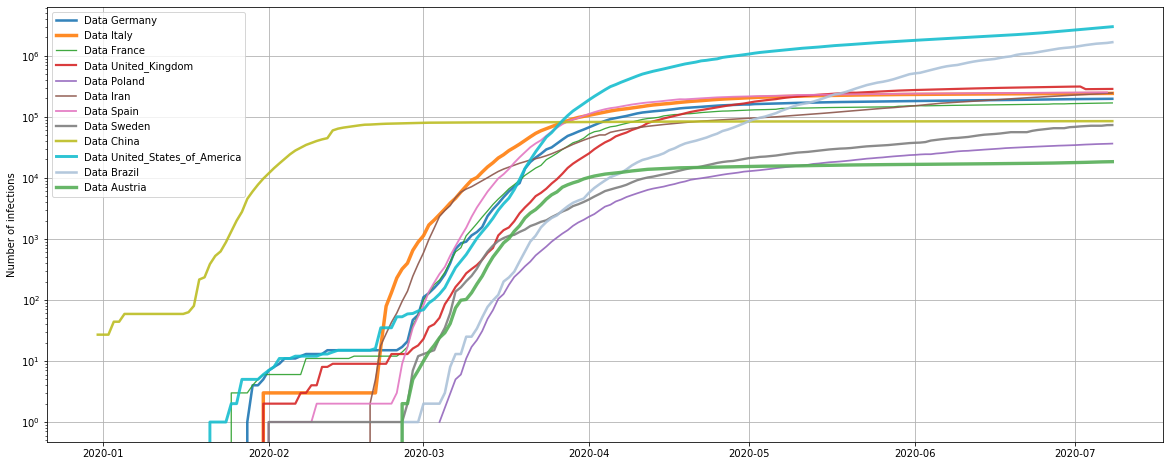

Infections Germany: 2020-07-08 00:00:00 197341


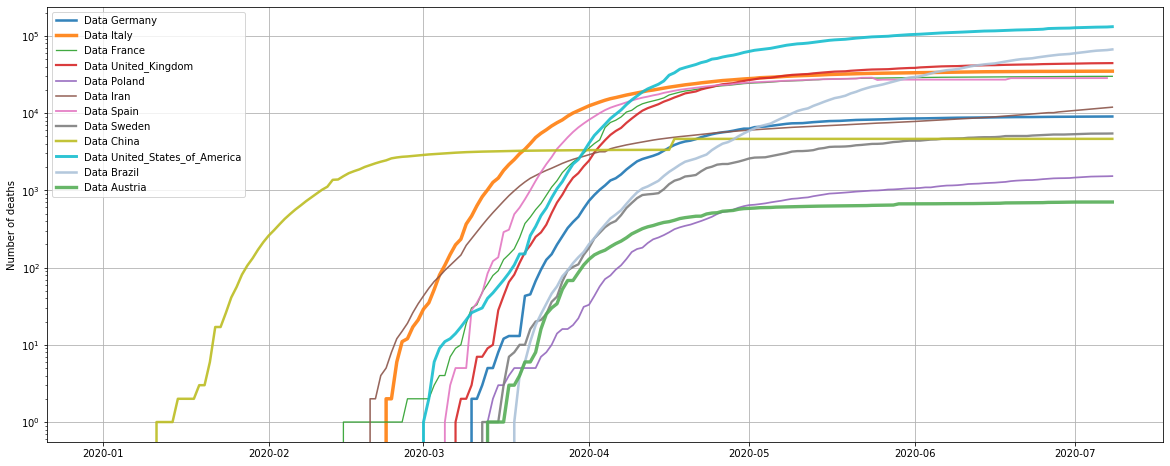

Deaths Germany: 2020-07-08 00:00:00 9036


In [8]:
# Plotte Anzahl der Gesamtinfektionen
plt.figure(1, figsize=(20,8))

for einland in land.values():
    einland.plot_data()


plt.ylabel('Number of infections')
plt.legend()

plt.grid(True)
plt.yscale("log")

plt.show()

name_key = "Germany"
print('Infections %s:' % name_key,land[name_key].dates[-1],land[name_key].numbers()[-1])

# Plotte Anzahl der Verstorbenen
plt.figure(2, figsize=(20,8))

for name in land.values():
    name.plot_data(key=key_deaths)

plt.ylabel('Number of deaths')
plt.legend()

plt.grid(True)
plt.yscale("log")

plt.show()

print('Deaths %s:' % name_key,land[name_key].dates[-1],land[name_key].numbers(key_deaths)[-1])

### Vorhersage

Nun fügen wir einige Plots der Trendlinien hinzu. Wir berechnen diese aus den Daten der letzten 14 Tage.
Außerdem geben wir die hochgerechnete Anzahl an Infizierten und Verstorbenen am 1.11.2020 aus.

Germany (Exp. Anstieg:  2.12e-03) -> Anzahl Infektionen 2020-11-01: 252534
Germany (Pol. Anstieg:  3.28e-01) -> Anzahl Infektionen 2020-11-01: 235818

Spain (Exp. Anstieg:  1.45e-03) -> Anzahl Infektionen 2020-11-01: 298484
Spain (Pol. Anstieg:  2.18e-01) -> Anzahl Infektionen 2020-11-01: 284272

France (Exp. Anstieg:  3.45e-03) -> Anzahl Infektionen 2020-11-01: 251949
France (Pol. Anstieg:  5.45e-01) -> Anzahl Infektionen 2020-11-01: 225592

Brazil (Exp. Anstieg:  2.64e-02) -> Anzahl Infektionen 2020-11-01: 35934205
Brazil (Pol. Anstieg:  3.33e+00) -> Anzahl Infektionen 2020-11-01: 13570669

United_States_of_America (Exp. Anstieg:  1.76e-02) -> Anzahl Infektionen 2020-11-01: 22964347
United_States_of_America (Pol. Anstieg:  2.85e+00) -> Anzahl Infektionen 2020-11-01: 13219725

Germany (Exp. Anstieg:  9.03e-04) -> Anzahl Verstorben 2020-11-01: 10036
Germany (Pol. Anstieg:  1.40e-01) -> Anzahl Verstorben 2020-11-01: 9747

Spain (Exp. Anstieg:  1.89e-04) -> Anzahl Verstorben 2020-11-01: 

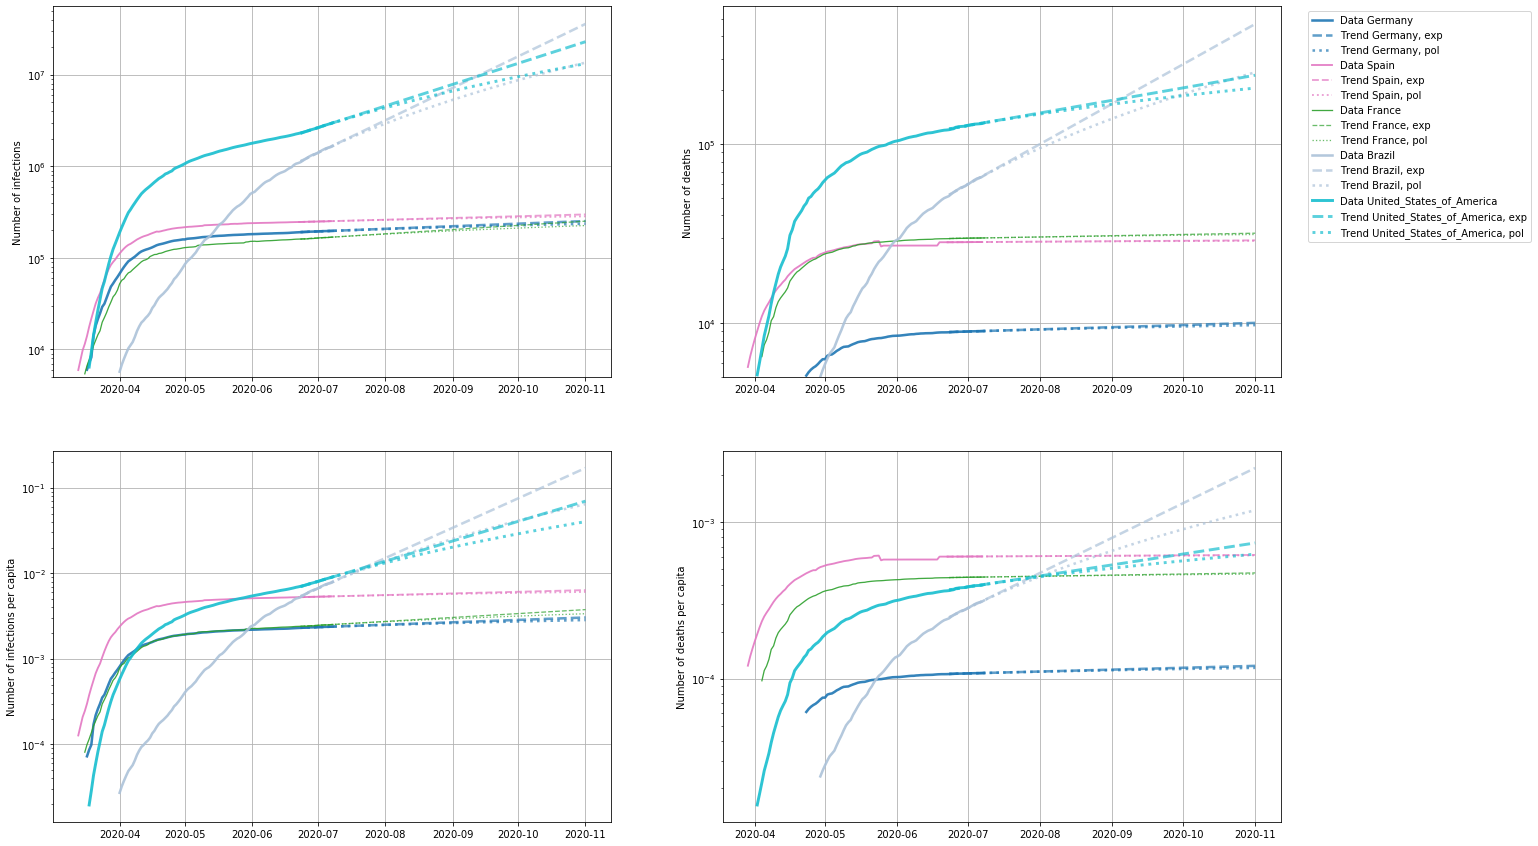

In [9]:
auswahl = ["Germany", "Spain", "France", "Brazil", "United_States_of_America"]

datum='2020-11-01'
tage = 14
limit = 5000

plt.figure(3, figsize=(22,15))

#########################################################

plt.subplot(221)
for name in auswahl:
    land[name].plot_data(mask_limit=limit)
    nexp,bexp=land[name].plot_trend(end_date=datum, days_past=tage)
    npol,bpol=land[name].plot_trend(end_date=datum, days_past=tage, model='pol')
    print('%s (Exp. Anstieg: %9.2e) -> Anzahl Infektionen %s: %d'  %(name, bexp, datum, nexp))
    print('%s (Pol. Anstieg: %9.2e) -> Anzahl Infektionen %s: %d\n'%(name, bpol, datum, npol))

#plt.legend()
plt.yscale("log")
plt.ylim([limit,None])
plt.ylabel('Number of infections')
plt.grid(True)

#########################################################

plt.subplot(222)

for name in auswahl:
    land[name].plot_data(mask_limit=limit, key=key_deaths)
    nexp,bexp=land[name].plot_trend(end_date=datum, days_past=tage, key=key_deaths)
    npol,bpol=land[name].plot_trend(end_date=datum, days_past=tage, model='pol', key=key_deaths)
    print('%s (Exp. Anstieg: %9.2e) -> Anzahl Verstorben %s: %d'  %(name, bexp, datum, nexp))
    print('%s (Pol. Anstieg: %9.2e) -> Anzahl Verstorben %s: %d\n'%(name, bpol, datum, npol))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.yscale("log")
plt.ylim([limit,None])
plt.ylabel('Number of deaths')
plt.grid(True)


#########################################################
# Betrachtung bezogen auf die Bevölkerungsgröße
#########################################################

# per-capita boolean Schalter
pc = True

plt.subplot(223)


for name in auswahl:
    land[name].plot_data(mask_limit=limit, per_capita=pc)
    nexp,bexp=land[name].plot_trend(end_date=datum, days_past=tage, per_capita=pc)
    npol,bpol=land[name].plot_trend(end_date=datum, days_past=tage, model='pol', per_capita=pc)

#plt.legend()
plt.yscale("log")
plt.ylabel('Number of infections per capita')
plt.grid(True)

#########################################################

plt.subplot(224)

for name in auswahl:
    land[name].plot_data(mask_limit=limit, per_capita=pc, key=key_deaths)
    nexp,bexp=land[name].plot_trend(end_date=datum, days_past=tage, per_capita=pc, key=key_deaths)
    npol,bpol=land[name].plot_trend(end_date=datum, days_past=tage, model='pol', per_capita=pc, key=key_deaths)

#plt.legend()
plt.yscale("log")
plt.ylabel('Number of deaths per capita')

plt.grid(True)

plt.show()

### Also: Immer schön die Hände waschen, Abstand halten und Maske tragen!